# Project 2 - Supervised Learning: Regression
This notebook is a part of my second project required by the IBM Machine Learning Program.

Data Source: Ford dataset from [100,000 UK Used Car Data set](https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes)

The main objective of this analysis is to predict price(£) of used Ford cars using Linear Regressions.

Notebook Contents:

>1. Train test split<br>

>2. Simple EDA<br>
Descriptive statistics and data cleaning<br>
Numerical features<br>
Categorical features

>3. Model variations<br>
Apply One-hot encoding<br>
Apply Square root transformation<br>
Apply Standard scaling<br>
Add Polynomial features

>4. Cross-validation and Regularization<br>
Linear Regression<br>
Lasso Regression (L1)<br>
Ridge Regression (L2)<br>
Elastic Net Regression (L1 + L2)<br>
Compare the metrics

>5. Predict on the test set<br>
Scatter plots of four models<br>
Feature importance

>6. Conclusion

## 1. Train test split

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [323]:
def load_data(path):
    return pd.read_csv(path)

In [324]:
df = load_data(r"D:\A Portfolio Projects\ML Projects\Ford_uk_2nd_car\ford.csv")

In [325]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [326]:
df.shape

(17966, 9)

In [327]:
df = df.drop_duplicates(keep='first', ignore_index=True)

In [328]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17807,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17808,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17809,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17810,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [329]:
from sklearn.model_selection import train_test_split
train_val, test = train_test_split(df, test_size=0.20, random_state=0)
train_val.shape, test.shape

((14249, 9), (3563, 9))

In [330]:
train, val = train_test_split(train_val, test_size=0.25, random_state=0)
train.shape, val.shape

((10686, 9), (3563, 9))

## 2. Simple EDA
### Descriptive statistics and data cleaning

In [331]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10686 entries, 10148 to 2308
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10686 non-null  object 
 1   year          10686 non-null  int64  
 2   price         10686 non-null  int64  
 3   transmission  10686 non-null  object 
 4   mileage       10686 non-null  int64  
 5   fuelType      10686 non-null  object 
 6   tax           10686 non-null  int64  
 7   mpg           10686 non-null  float64
 8   engineSize    10686 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 834.8+ KB


In [332]:
train.describe(percentiles=[0.25,0.5,.75,.90,.95,.99])

,year,price,mileage,tax,mpg,engineSize
count,10686.000000,10686.000000,10686.000000,10686.000000,10686.000000,10686.000000
mean,2016.857758,12279.024705,23397.160584,113.310874,57.800618,1.354061
std,2.086250,4787.008905,19464.538648,61.535386,10.196437,0.434618
min,1996.000000,675.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,10000.000000,30.000000,52.300000,1.000000
50%,2017.000000,11283.500000,18339.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,30982.500000,145.000000,65.700000,1.500000
90%,2019.000000,18398.500000,48005.000000,150.000000,67.300000,2.000000
95%,2019.000000,20000.000000,62997.000000,160.000000,74.300000,2.000000
99%,2020.000000,26798.000000,93490.000000,235.000000,80.700000,2.000000


In [333]:
# Add in new feature age, and remove year
# The data were collected in 2020, so the age column is calculated from this year
train = train[train['year']<2060]
train['age'] = 2020-train['year']
train = train.drop(['year'], axis=1)

In [334]:
cat_cols = train.select_dtypes(include=object).columns.tolist()
num_cols = train.select_dtypes(exclude=object).columns.tolist()

### Numerical features

In [335]:
def hist_loop(data, row, col, figsize):
    plt.figure(figsize=figsize)
    sns.set_style('darkgrid')
    for i, column in enumerate(data.columns):
        plt.subplot(row, col, i+1)
        sns.histplot(data[column], bins=30)
        sns.despine()
        if i not in (0,3):
            plt.ylabel('')
        else:
            plt.ylabel('Frequency')
    plt.show()

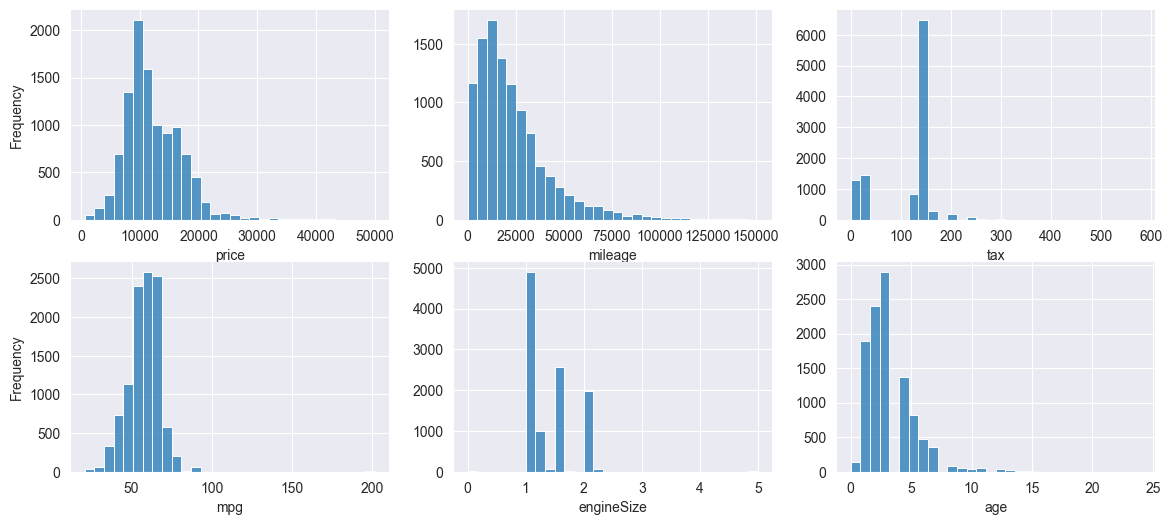

In [336]:
hist_loop(train[num_cols], 2, 3, (14,6))

Now, let's check the skewness of all numerical features.

In [337]:
def skew_col(data, limit):
    data = pd.DataFrame({
    'num_col' : data.skew().index,
    'value' : data.skew().values
})
    return data[abs(data['value'])>limit]

In [338]:
train_sqrt = skew_col(train[num_cols],1)
train_sqrt

,num_col,value
0,price,1.121386
1,mileage,1.800782
4,engineSize,1.980104
5,age,1.894205


Except for tax and mpg, all features are right-skewed, and also there are zero values in engineSize (electric cars). Square root transformation might be a good choice to eliminate the skewness in this case.

In [339]:
# Apply square root transformation on predictors only
train_sqrt_df = train[num_cols].drop('price', axis=1)
for col in train_sqrt.num_col:
    if col != 'price':
        train_sqrt_df[col] = train_sqrt_df[col].apply(np.sqrt)


In [340]:
skew_col(train_sqrt_df,1)

,num_col,value


Skewness is fixed. Let's use a pairplot to have an overview of these features and the target.

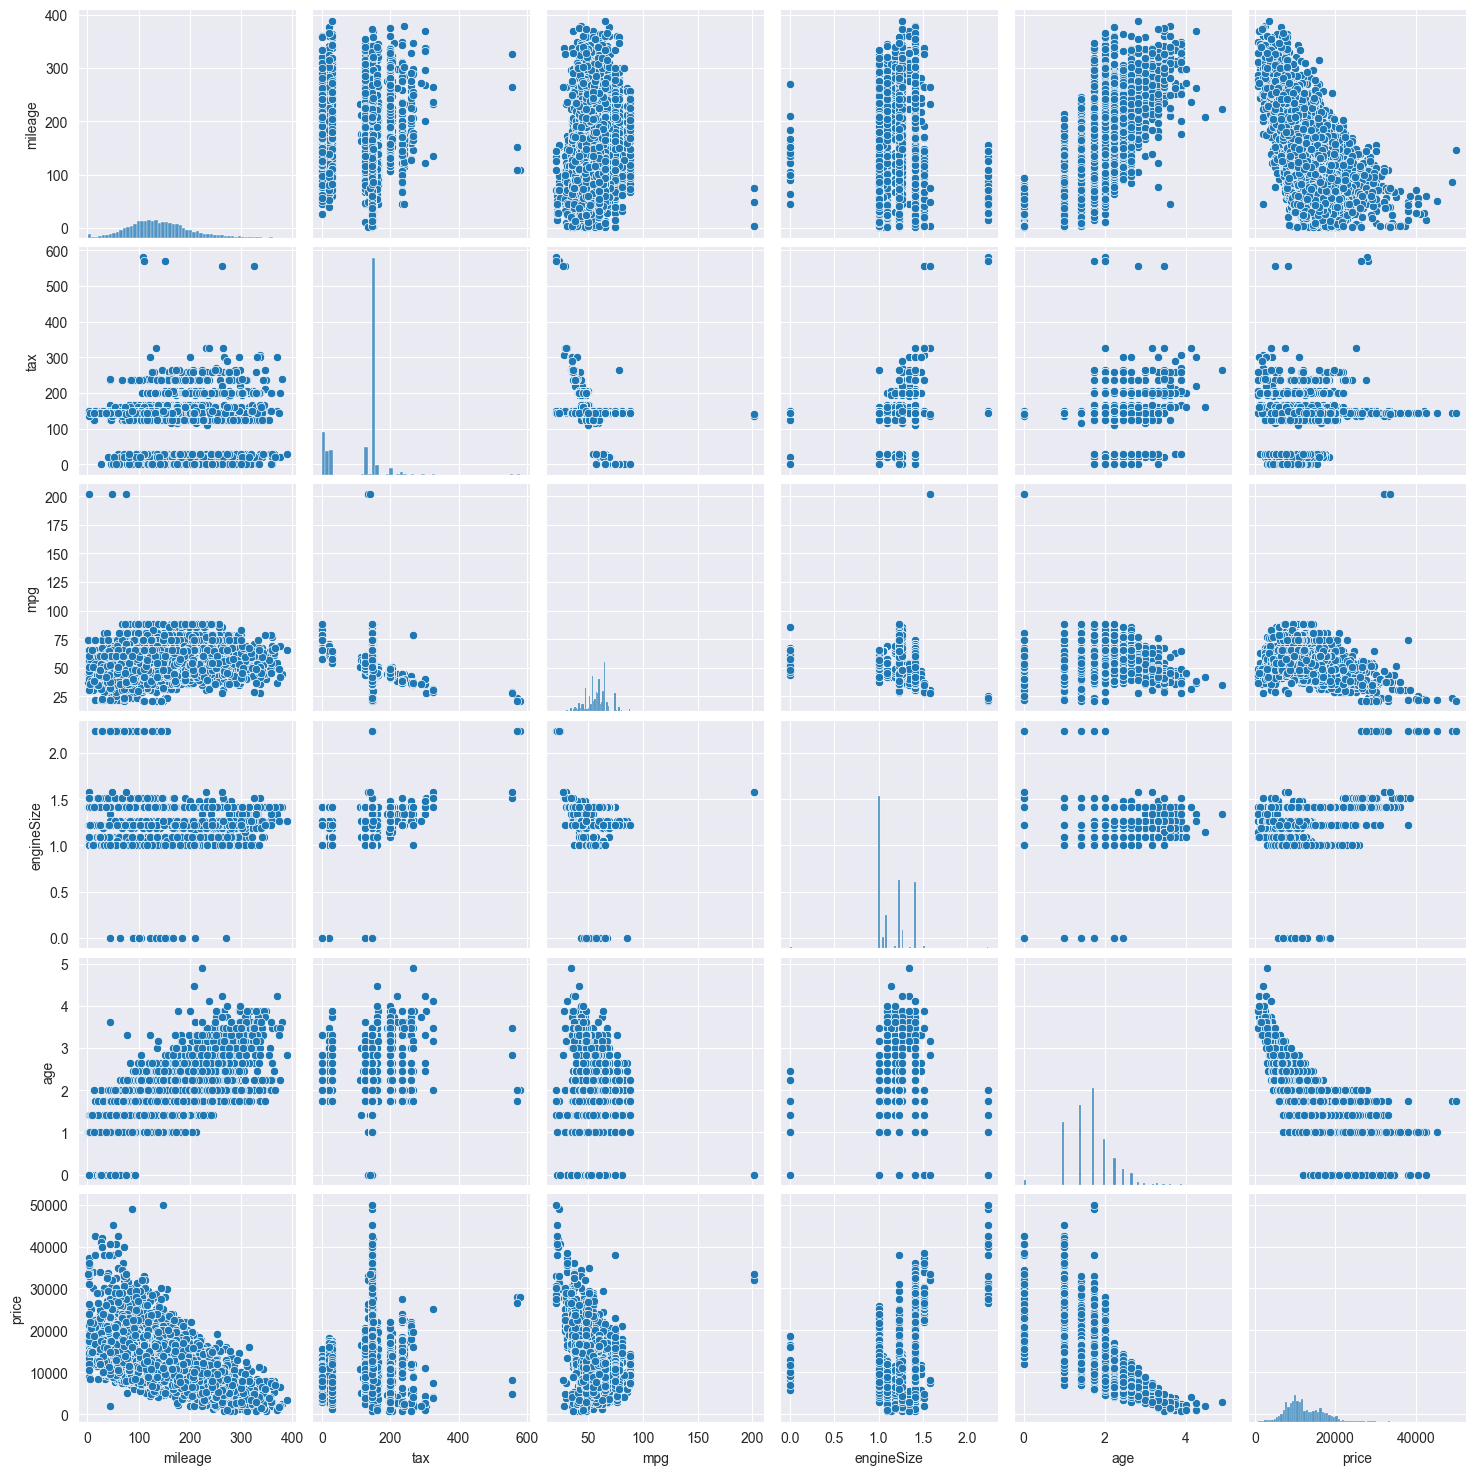

In [341]:
sns.pairplot(train_sqrt_df.join(train.price))

This plot shows that:
- age has a linear relationship with price. It looks quite like polynomial. 
- age also has a linear relationship with mileage (the older the more miles). This is multicollinearity.

Let's see how severe the multicollinearity is.

In [342]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(data):
    vif = pd.DataFrame()
    vif['cols'] = data.columns
    vif['vif_score'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif

In [343]:
cal_vif(train_sqrt_df)

,cols,vif_score
0,mileage,14.938302
1,tax,5.130676
2,mpg,17.133086
3,engineSize,30.440503
4,age,22.392909


<Axes: >

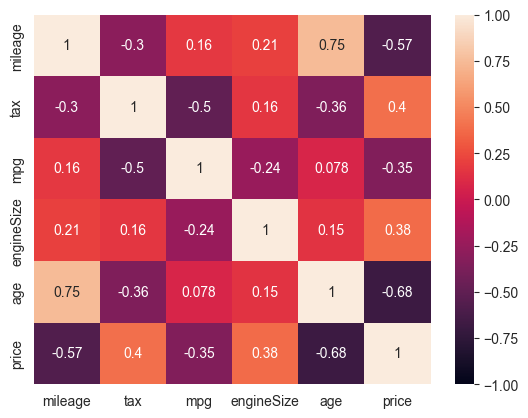

In [344]:
sns.heatmap(train_sqrt_df.join(train['price']).corr(), annot=True, vmax=1, vmin=-1)

The features have high multicollinearity. This problem might be resolved by regularization later.

### Categorical features

There is a leading space in each model name. This is not necessary but let's just remove them.

In [345]:
train['model'] = train['model'].str.strip()

In [346]:
train.model.unique()

array(['B-MAX', 'Fiesta', 'Mustang', 'Kuga', 'EcoSport', 'Focus', 'C-MAX',
       'S-MAX', 'Galaxy', 'Ka+', 'KA', 'Mondeo', 'Edge', 'Puma', 'Fusion',
       'Grand C-MAX', 'Grand Tourneo Connect', 'Tourneo Custom', 'Escort',
       'Tourneo Connect', 'Streetka'], dtype=object)

In [347]:
train_sqrt.num_col.tolist()

['price', 'mileage', 'engineSize', 'age']